In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os 

print(os.listdir('../data/signate_click'))

['.DS_Store', 'train.tsv', 'test.tsv', 'sample_submit.csv']


In [2]:
df_train = pd.read_csv('../data/signate_click/train.tsv', delimiter='\t')
df_test = pd.read_csv('../data/signate_click/test.tsv', delimiter='\t')

In [3]:
print(df_train.shape, df_test.shape)

(1169042, 22) (1295086, 21)


In [4]:
df_train.head()

,id,click,I1,I2,C1,C2,C3,C4,C5,C6,...,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14
0,0,0,5,20,421256035,2377199148,2696211399,2298910535,3133252034,1509930964,...,0,0,0,0,0,0,NaN,NaN,NaN,780.0
1,1,0,5,20,2581703001,2589684548,1998340283,2411205997,3202148071,1238839469,...,1,1,0,0,0,0,NaN,NaN,NaN,0.0
2,2,0,5,20,2581703001,1862037199,2448089184,2411205997,1107442947,3668889797,...,0,0,0,0,1,0,NaN,NaN,NaN,117.0
3,3,0,5,20,421256035,3874378935,1658216424,2298910535,2321672976,1509930964,...,0,0,0,0,0,0,6.0,6.0,34501.0,390.0
4,4,1,5,20,421256035,3874378935,1892769125,2411205997,2321672976,1509930964,...,0,0,0,0,0,0,1.0,31.0,12557.0,390.0


y_train = df_train['click'].values
df_train.drop(['click'], axis=1, inplace=True)
print(df_train.shape)

In [5]:
Drop = ['I11', 'I12', 'I13', 'I14']
df_train.drop(Drop, axis=1, inplace=True)
df_test.drop(Drop, axis=1, inplace=True)

In [6]:
def kesson_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / len(df)).sort_values(ascending=False)
    kesson_table = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return kesson_table

click       0      1
I1                  
0      148192  11739
1      153936  12155
2      156302  12234
3      154721  12541
4      150801  13304
5      162492  13480
6      154851  12294


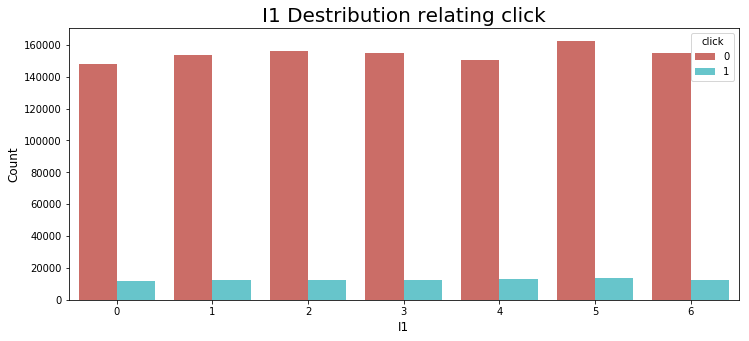

In [7]:
print(pd.crosstab(df_train['I1'], df_train['click']))

plt.figure(figsize=(12, 5))

sns.countplot(x='I1', data=df_train, hue='click', palette='hls')
plt.title('I1 Destribution relating click', fontsize=20)
plt.ylabel('Count', fontsize=12)
plt.xlabel('I1', fontsize=12)

plt.show()

click      0     1
I2                
0      18166  1094
1      20957  1347
2      27994  1720
3      34012  2322
4      41722  3086
5      50009  3645
6      50025  3929
7      49942  3873
8      51020  4272
9      49733  3931
10     48791  4002
11     48667  4246
12     48921  4159
13     52636  4452
14     50979  4305
15     52502  4426
16     60873  5535
17     61471  5761
18     57623  5553
19     55503  5059
20     56258  4265
21     41576  3122
22     30081  2159
23     21834  1484


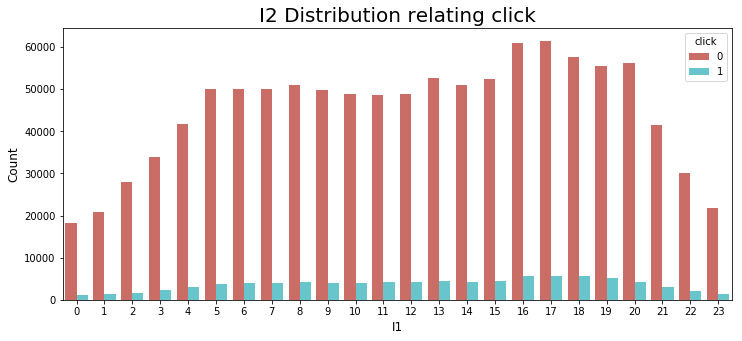

In [8]:
print(pd.crosstab(df_train['I2'], df_train['click']))

plt.figure(figsize=(12, 5))
sns.countplot(x='I2', data=df_train, hue='click', palette='hls')
plt.title('I2 Distribution relating click', fontsize=20)
plt.xlabel('I1', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

click            0      1
C1                       
421256035   692621  74271
1045405899   14453    425
1111213504   14951    608
2068315619    4516    612
2387281372   29350    995
2541535031   20618   1007
2581703001  220202   7389
2686811630   32392    730
3651044092   52192   1710


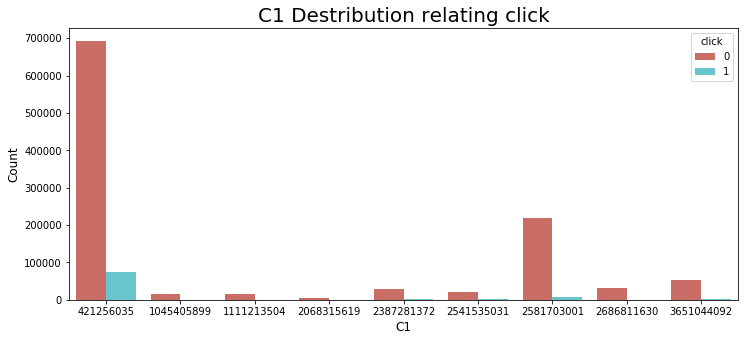

In [9]:
print(pd.crosstab(df_train['C1'], df_train['click']))

plt.figure(figsize=(12, 5))
sns.countplot(x='C1', data=df_train, hue='click', palette='hls')
plt.title('C1 Destribution relating click', fontsize=20)
plt.xlabel('C1', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [10]:
df_train['I9'].value_counts()

0    745096
1    423946
Name: I9, dtype: int64

click       0      1
I9                  
0      678432  66664
1      402863  21083


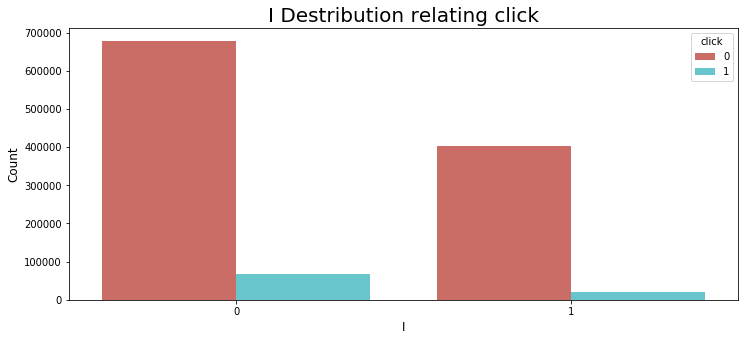

In [11]:
print(pd.crosstab(df_train['I9'], df_train['click']))

plt.figure(figsize=(12, 5))
sns.countplot(x='I9', data=df_train, hue='click', palette='hls')
plt.title('I Destribution relating click', fontsize=20)
plt.xlabel('I', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [12]:
df_train.describe()

,id,click,I1,I2,C1,C2,C3,C4,C5,C6,I3,I4,I5,I6,I7,I8,I9,I10
count,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06,1.169042e+06
mean,5.845205e+05,7.505889e-02,3.031627e+00,1.220570e+01,1.169567e+09,2.381345e+09,2.012817e+09,2.177769e+09,1.888389e+09,2.186933e+09,1.256480e+00,4.682569e-01,3.292790e-01,1.047524e-01,5.746586e-02,8.747077e-02,3.626439e-01,3.801831e-01
std,3.374735e+05,2.634865e-01,1.992983e+00,6.139743e+00,1.087105e+09,1.099911e+09,1.195821e+09,4.357866e+08,9.501573e+08,9.617819e+08,6.717402e-01,7.035656e-01,5.794303e+00,3.062343e-01,2.327307e-01,2.825238e-01,4.807635e-01,4.854319e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.212560e+08,5.393295e+07,2.200363e+07,4.001228e+08,2.446028e+07,1.477335e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.922602e+05,0.000000e+00,1.000000e+00,7.000000e+00,4.212560e+08,1.537671e+09,1.025908e+09,2.298911e+09,1.410458e+09,1.509931e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.845205e+05,0.000000e+00,3.000000e+00,1.300000e+01,4.212560e+08,1.862037e+09,1.998340e+09,2.411206e+09,2.321673e+09,1.769723e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.767808e+05,0.000000e+00,5.000000e+00,1.700000e+01,2.581703e+09,3.874379e+09,2.903162e+09,2.411206e+09,2.321673e+09,3.111152e+09,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,1.169041e+06,1.000000e+00,6.000000e+00,2.300000e+01,3.651044e+09,4.218832e+09,4.231334e+09,3.954818e+09,4.272797e+09,4.161523e+09,2.000000e+00,2.000000e+00,1.965000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


click           0     1
C3                     
22003630      132    15
24460281      230    14
35720145     1176    14
37584204        5     0
38997971       42     1
51265675        1     0
61263983      406    12
62975236      335    32
90117617     1347    54
94225145       23     5
98956388    67785  6168
100145248      94     9
118129556     570   143
129993176     195    23
131247750      10     1
140916896    3217   110
150404703     164   147
184504044      10     0
189706718   55403  1597
191235966       4     0
204574253     281    79
211789231      11     1
230134730       1     2
238283533     186    16
249453585    1224   154
264749532     703    28
264887721      38     9
271030935     143    10
290128197     132    65
293336113      53    12
...           ...   ...
3834077679   2191   394
3839778771   1440   874
3843499228    645   126
3853303930     52     3
3862505502  21204   490
3889790948  21884  5872
3897865301    146     7
3921363369      6     0
3932286520     3

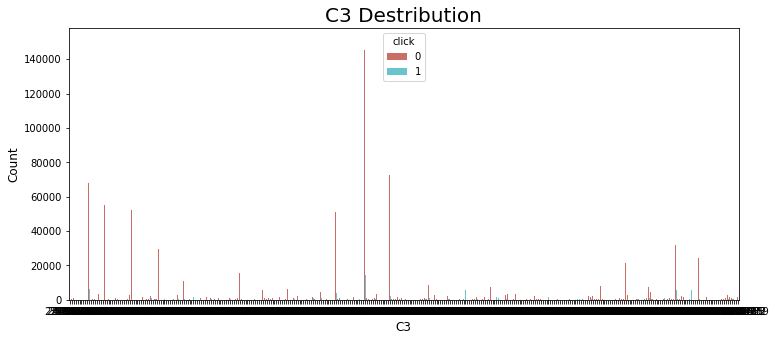

In [13]:
print(pd.crosstab(df_train['C3'], df_train['click']))

plt.figure(figsize=(12, 5))
sns.countplot(x='C3', data=df_train, hue='click', palette='hls')
plt.title('C3 Destribution', fontsize=20)
plt.xlabel('C3', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [14]:
crosstab = pd.crosstab(df_train['C3'], df_train['click'])
crosstab.columns = ['off', 'on']
crosstab['Ratio'] = crosstab['on'] / crosstab['off'] * 100
crosstab['Ratio'] = crosstab['Ratio'].replace({np.inf: 0})
#crosstab['Ratio'].value_counts().sort_values(ascending=False)

In [15]:
crosstab['Ratio'].describe()

count    347.000000
mean      13.304329
std       21.647880
min        0.000000
25%        1.974137
50%        6.993007
75%       14.890630
max      200.000000
Name: Ratio, dtype: float64

In [16]:
interval = (-1, 2, 7, 15, 300)
label_name = ('first', 'second', 'third', 'forth')

crosstab['Ratio'] = pd.cut(crosstab['Ratio'], interval, labels=label_name)

In [17]:
crosstab

,off,on,Ratio
C3,,,
22003630,132,15,third
24460281,230,14,second
35720145,1176,14,first
37584204,5,0,first
38997971,42,1,second
51265675,1,0,first
61263983,406,12,second
62975236,335,32,third
90117617,1347,54,second


In [18]:
for index in crosstab.index:
    df_train['C3'] = df_train['C3'].replace({index: crosstab[crosstab.index == index]['Ratio'].values[0]})

In [19]:
for index in crosstab.index:
    df_test['C3'] = df_test['C3'].replace({index: crosstab[crosstab.index == index]['Ratio'].values[0]})

In [20]:
map_list = {'first':1, 'second': 1.5, 'third': 2, 'forth': 3}

df_train['C3'] = df_train['C3'].map(map_list)
df_test['C3'] = df_test['C3'].replace(map_list)

In [21]:
df_test['C3'][df_test['C3'] > 3.0] = (1 + 1.5 + 2 + 3) / 4

/Users/anankoki/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_test['C3'].value_counts()

1.500    566125
2.000    428602
3.000    169306
1.000    130923
1.875       130
Name: C3, dtype: int64

In [23]:
df_train['C3'].value_counts()

1.5    491320
2.0    372093
3.0    185704
1.0    119925
Name: C3, dtype: int64

click            0      1
C4                       
400122826    12708    285
1332932160  143783  18400
1404944795     135     10
1825710598   72971   5032
2298910535  289048  22665
2411205997  559049  39171
3954817824    3601   2184


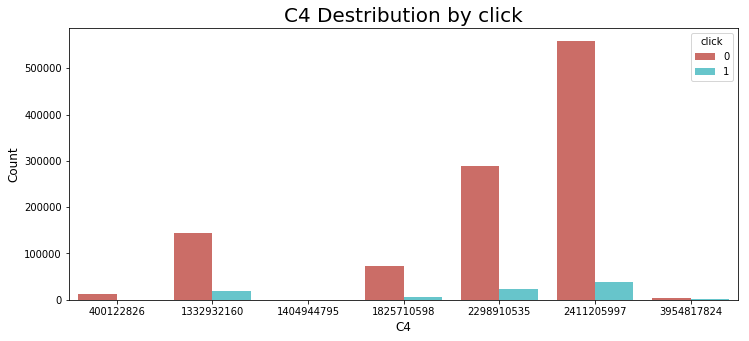

In [24]:
print(pd.crosstab(df_train['C4'], df_train['click']))

plt.figure(figsize=(12, 5))
sns.countplot(x='C4', data=df_train, hue='click', palette='hls')
plt.title('C4 Destribution by click', fontsize=20)
plt.xlabel('C4', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [25]:
cross_c4= pd.crosstab(df_train['C4'], df_train['click'])
cross_c4.columns = ['off', 'on']
cross_c4['Ratio'] = cross_c4['on'] / cross_c4['off'] * 100
cross_c4['Ratio'] = cross_c4['Ratio'].replace({np.inf: 0})

In [26]:
cross_c4['Ratio'].describe()

count     7.000000
mean     14.977263
std      20.371421
min       2.242682
25%       6.951305
50%       7.407407
75%      10.319160
max      60.649819
Name: Ratio, dtype: float64

In [27]:
interval = (0, 7, 8, 11, 60)
label_name = [1, 1.5, 2, 3]
cross_c4['Ratio'] = pd.cut(cross_c4['Ratio'], interval, labels=label_name)

In [28]:
for index in cross_c4.index:
    df_train['C4'] = df_train['C4'].replace({index: cross_c4[cross_c4.index == index]['Ratio'].values[0]})

In [29]:
for index in cross_c4.index:
    df_test['C4'] = df_test['C4'].replace({index: cross_c4[cross_c4.index == index]['Ratio'].values[0]})

click            0     1
C5                      
24460281       595    29
24494780      3386    92
67175547      4800   193
90173880       931    35
100416543      669    46
114161245     1277    49
116847414     1274    97
155193773     1009    34
165736581      635    37
251756541      702    18
265977211     9301  1050
271697625     1035    39
286864644     1206   210
321621999      667    31
333117911      899    42
347848598     1070    72
361350034     1230    82
377353736     1053    48
392901764      876    43
405013202     9604   376
431670337     2082   122
446821382    17705  1148
476085660   108052  2791
477170108     1861    88
494458745      280    26
501492455     2803   115
518945081     6643   453
519469067      363    41
571532436      775    98
641415682      603    55
...            ...   ...
3667762485       1     0
3679904194      12     0
3694254117    1383   101
3731995807    1119   143
3736038947    1208    92
3771951677     517    10
3800848110    4005   221


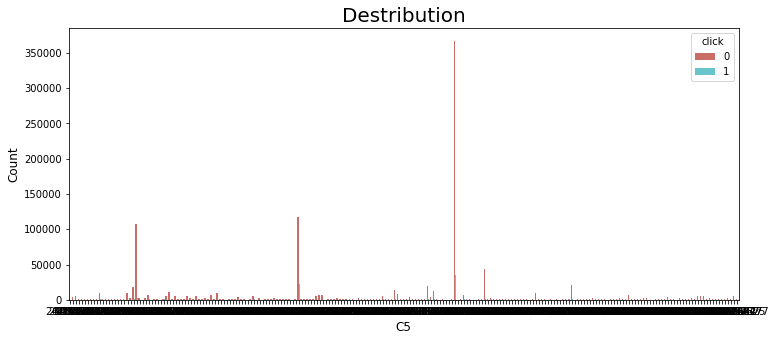

In [30]:
print(pd.crosstab(df_train['C5'], df_train['click']))

plt.figure(figsize=(12, 5))
sns.countplot(x='C5', data=df_train, hue='click', palette='hls')
plt.title('Destribution', fontsize=20)
plt.xlabel('C5', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [31]:
cross_c5 = pd.crosstab(df_train['C5'], df_train['click'])
cross_c5.columns = ['off', 'on']
cross_c5['Ratio'] = cross_c5['on'] / cross_c5['off'] * 100
cross_c5.describe()

,off,on,Ratio
count,223.000000,223.000000,223.000000
mean,4848.856502,393.484305,8.743339
std,26831.890775,2768.645027,27.252680
min,1.000000,0.000000,0.000000
25%,629.500000,31.500000,3.348992
50%,952.000000,55.000000,5.331754
75%,1818.000000,124.500000,8.624141
max,366824.000000,34767.000000,400.000000


In [32]:
interval = (-1, 3.5, 5.5, 9, 500)
label_value = [1, 1.5, 2, 2.5]
cross_c5['Ratio'] = pd.cut(cross_c5['Ratio'], interval, labels=label_value)

In [33]:
for index in cross_c5.index:
    df_train['C5'] = df_train['C5'].replace({index: cross_c5[cross_c5.index == index]['Ratio'].values[0]})

In [34]:
for index in cross_c5.index:
    df_test['C5'] = df_test['C5'].replace({index: cross_c5[cross_c5.index == index]['Ratio'].values[0]})

In [35]:
df_test['C5'][df_test['C5'] > 3] = (1 + 1.5 + 2 + 2.5) / 4

/Users/anankoki/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


click            0      1
C2                       
53932946       149      4
71293199      9985   1944
102346738     6117    459
155193773        1      0
189706718       61      0
192106456      247     28
228048336        8      1
266672125     1716    139
280395364       64     13
330730226     2163    123
344257135     2250     71
363130183        9      2
364377489     4930    266
395799033       42      1
421256035     7229    783
450817360       17      1
552338065     2698    138
585333929      896    225
600687045      942     71
668442991      601      7
693765660      241     21
712451701     4078   1416
727692042     4896   1525
749836023     4150    244
750939299     1426     84
760127602      266     18
762407002        3      5
785241772      923     61
805769945      126     16
860314843        6      0
...            ...    ...
3353718864      15      3
3404861148     470     10
3447893652      80      2
3454097143     150      8
3483209424     569     30
3585793711  

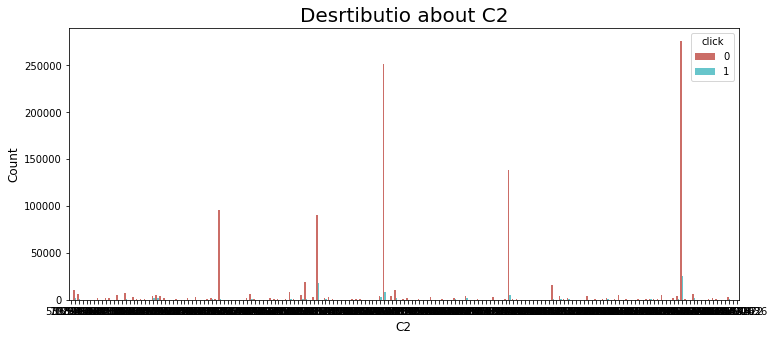

In [36]:
print(pd.crosstab(df_train['C2'], df_train['click']))

plt.figure(figsize=(12, 5))
sns.countplot(x='C2', data=df_train, hue='click', palette='hls')
plt.title('Desrtibutio about C2', fontsize=20)
plt.xlabel('C2', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [37]:
crossc2 = pd.crosstab(df_train['C2'], df_train['click'])
crossc2.columns = ['off', 'on']
crossc2['Ratio'] = crossc2['on'] / crossc2['off'] * 100
crossc2['Ratio'] = crossc2['Ratio'].replace({np.inf: 0})
crossc2['Ratio'].describe()

count    171.000000
mean      12.299825
std       22.571752
min        0.000000
25%        2.087502
50%        6.214689
75%       13.826134
max      200.000000
Name: Ratio, dtype: float64

In [38]:
interval = (-1, 2.1, 6.3, 14, 300)
label_name = [1, 1.5, 2, 2.5]
crossc2['Ratio'] = pd.cut(crossc2['Ratio'], interval, labels=label_name)

In [39]:
for index in crossc2.index:
    df_train['C2'] = df_train['C2'].replace({index: crossc2[crossc2.index == index]['Ratio'].values[0]})

In [40]:
for index in crossc2.index:
    df_test['C2'] = df_test['C2'].replace({index: crossc2[crossc2.index == index]['Ratio'].values[0]})

In [41]:
cross = pd.crosstab(df_train['I1'], df_train['click'])
cross.columns = ['off', 'on']
cross['Ratio'] = cross['on'] / cross['off'] * 100
cross['Ratio'] = cross['Ratio'].replace({np.inf: 0})
cross['Ratio'].describe()

count    7.000000
mean     8.115370
std      0.349293
min      7.827155
25%      7.908809
50%      7.939245
75%      8.200675
max      8.822223
Name: Ratio, dtype: float64

In [42]:
interval = (7, 7.9, 7.94, 8.3, 10)
label_name = [1, 1.2, 1.4, 1.6]
cross['Ratio'] = pd.cut(cross['Ratio'], interval, labels=label_name)

In [43]:
for index in cross.index:
    df_train['I1'] = df_train['I1'].replace({index: cross[cross.index == index]['Ratio'].values[0]})

In [44]:
for index in cross.index:
    df_test['I1'] = df_test['I1'].replace({index: cross[cross.index == index]['Ratio'].values[0]})

In [45]:
df_train.head()

,id,click,I1,I2,C1,C2,C3,C4,C5,C6,I3,I4,I5,I6,I7,I8,I9,I10
0,0,0,1.4,20,421256035,2.5,3.0,1.5,2.5,1509930964,1,0,0,0,0,0,0,0
1,1,0,1.4,20,2581703001,1.5,1.5,1.5,2.0,1238839469,0,2,1,1,0,0,0,0
2,2,0,1.4,20,2581703001,1.5,1.5,1.5,1.0,3668889797,2,1,0,0,0,0,1,0
3,3,0,1.4,20,421256035,2.0,2.0,1.5,2.5,1509930964,1,0,0,0,0,0,0,0
4,4,1,1.4,20,421256035,2.0,2.0,1.5,2.5,1509930964,1,0,0,0,0,0,0,0


In [46]:
df_test

,id,I1,I2,C1,C2,C3,C4,C5,C6,I3,I4,I5,I6,I7,I8,I9,I10
0,1169042,1.4,20,421256035,2.0,2.0,1.5,2.50,1509930964,1,0,0,0,0,0,0,0
1,1169043,1.4,20,421256035,2.5,3.0,1.5,2.50,3111151614,2,0,0,1,0,0,0,0
2,1169044,1.4,20,421256035,2.0,2.0,1.5,2.50,1509930964,2,0,0,0,0,0,0,0
3,1169045,1.4,20,2581703001,1.5,1.5,1.5,1.00,2068230268,1,1,0,0,0,0,0,1
4,1169046,1.4,20,421256035,2.0,2.0,1.5,2.50,1509930964,1,0,0,0,0,0,0,0
5,1169047,1.4,20,421256035,2.0,2.0,3.0,2.50,1509930964,1,0,0,0,0,0,0,1
6,1169048,1.4,20,421256035,2.0,2.0,1.5,2.50,1509930964,1,0,0,0,0,0,0,0
7,1169049,1.4,20,421256035,1.0,1.0,1.5,2.50,1509930964,1,0,0,1,0,0,1,0
8,1169050,1.4,20,421256035,2.5,3.0,3.0,2.50,3668889797,2,0,0,0,0,0,1,1
9,1169051,1.4,20,2387281372,1.5,1.5,1.5,1.00,2068230268,0,2,0,0,0,0,1,1


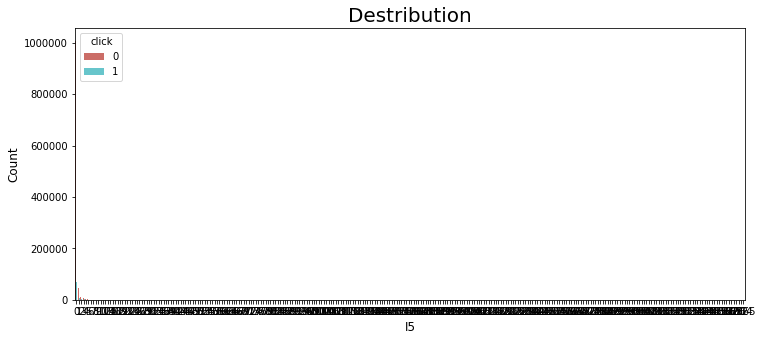

In [47]:
plt.figure(figsize=(12, 5))

sns.countplot(x='I5', hue='click',data=df_train, palette='hls')
plt.title('Destribution', fontsize=20)
plt.xlabel('I5', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [48]:
cross = pd.crosstab(df_train['I5'], df_train['click'])
cross.columns = ['off', 'on']
cross['Ratio'] = cross['on'] / cross['off'] * 100
cross['Ratio'] = cross['Ratio'].replace({np.inf: 0})
cross['Ratio'].describe()

count     276.000000
mean       66.029890
std       109.165710
min         0.000000
25%         0.000000
50%        14.285714
75%       100.000000
max      1000.000000
Name: Ratio, dtype: float64

In [49]:
interval = (-1, 14, 10000)
label_name = [1, 0]
cross['Ratio'] = pd.cut(cross['Ratio'], interval, labels=label_name)

In [50]:
for index in cross.index:
    df_train['I5'] = df_train['I5'].replace({index: cross[cross.index == index]['Ratio'].values[0]})
    
for index in cross.index:
    df_test['I5'] = df_test['I5'].replace({index: cross[cross.index == index]['Ratio'].values[0]})

In [51]:
df_train.I5.value_counts()

0    1168819
1        223
Name: I5, dtype: int64

In [52]:
cross = pd.crosstab(df_train['C6'], df_train['click'])
cross.columns = ['off', 'on']
cross['Ratio'] = cross['on'] / cross['off'] * 100
cross['Ratio'] = cross['Ratio'].replace({np.inf: 0})
cross['Ratio'].describe()

count    16.000000
mean      6.334457
std       3.429116
min       2.877698
25%       3.829274
50%       5.333215
75%       7.064001
max      14.643572
Name: Ratio, dtype: float64

In [53]:
interval = (2, 3.9, 5.4, 7.1, 20)
label_name = [0, 1, 2, 3]

cross['Ratio'] = pd.cut(cross['Ratio'], interval, labels=label_name)

In [54]:
for index in cross.index:
    df_train['C6'] = df_train['C6'].replace({index: cross[cross.index == index]['Ratio'].values[0]})
    
for index in cross.index:
    df_test['C6'] = df_test['C6'].replace({index: cross[cross.index == index]['Ratio'].values[0]})

In [55]:
columns = ['I2', 'C6', 'I3', 'I4']
prefix = ['I2', 'C6', 'I3', 'I4']

df_train = pd.get_dummies(df_train, columns=columns, prefix=prefix, drop_first=True)
df_test = pd.get_dummies(df_test, columns=columns, prefix=prefix, drop_first=True)

In [56]:
print(df_train.shape, df_test.shape)

(1169042, 44) (1295086, 43)


In [75]:
df_train = df_train.drop(['C4'], axis=1)
df_test = df_test.drop(['C4'], axis=1)

In [76]:
train = df_train.drop(['id', 'click'], axis=1)
train_ = df_train['click']

test_ = df_test.drop(['id'], axis=1)

X_train = train.values
y_train = train_.values

X_test = test_.values
X_test = X_test.astype(np.float, copy=False)

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [78]:
print(X_train.shape, y_train.shape, X_test.shape)

(1169042, 41) (1169042,) (1295086, 41)


In [79]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import Adam
import graphviz

In [100]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim=41, kernel_initializer='uniform'))
model.add(Dropout(0.4))
#model.add(Dense(50, activation='relu', kernel_initializer='uniform'))
#model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 7)                 294       
_________________________________________________________________
dropout_11 (Dropout)         (None, 7)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 8         
Total params: 302
Trainable params: 302
Non-trainable params: 0
_________________________________________________________________


Train on 935233 samples, validate on 233809 samples
Epoch 1/50
935233/935233 [==============================] - 2s 3us/step - loss: 0.3844 - acc: 0.9267 - val_loss: 0.3843 - val_acc: 0.9185
Epoch 2/50
935233/935233 [==============================] - 2s 2us/step - loss: 0.3790 - acc: 0.9267 - val_loss: 0.3768 - val_acc: 0.9185
Epoch 3/50
935233/935233 [==============================] - 2s 2us/step - loss: 0.3746 - acc: 0.9267 - val_loss: 0.3700 - val_acc: 0.9185
Epoch 4/50
935233/935233 [==============================] - 2s 2us/step - loss: 0.3701 - acc: 0.9267 - val_loss: 0.3640 - val_acc: 0.9185
Epoch 5/50
935233/935233 [==============================] - 2s 2us/step - loss: 0.3661 - acc: 0.9267 - val_loss: 0.3586 - val_acc: 0.9185
Epoch 6/50
935233/935233 [==============================] - 2s 2us/step - loss: 0.3627 - acc: 0.9267 - val_loss: 0.3538 - val_acc: 0.9185
Epoch 7/50
935233/935233 [==============================] - 2s 2us/step - loss: 0.3590 - acc: 0.9267 - val_loss: 0.3494 

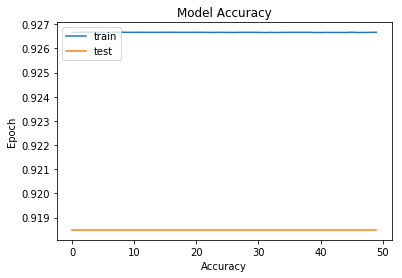

In [102]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train,validation_split=0.2, batch_size=10000, epochs=50, verbose=1)

score = model.evaluate(X_train, y_train, batch_size=20)
print('%s: %.2f%%' % (model.metrics_names[1], score[1]*100))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [86]:
scores = model.evaluate(X_train, y_train, batch_size=20)
print('%s: %0.2f%%' % (model.metrics_names[1], scores[1]*100))

1169042/1169042 [==============================] - 43s 37us/step
acc: 92.49%


In [103]:
predict = model.predict(X_test)

df_out = pd.read_csv('../data/signate_click/test.tsv', delimiter='\t')
df_out['click'] = predict
df_out[['id', 'click']].to_csv('../data/signate_click/output/submission.csv', index=False, header=False)

In [95]:
predict

array([[0.11005902],
       [0.15675834],
       [0.08850226],
       ...,
       [0.08177296],
       [0.05052413],
       [0.04634697]], dtype=float32)